In [9]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

from moviepy.editor import *
from scipy.io import wavfile
from scipy.signal import find_peaks

In [10]:
video_clip = VideoFileClip("./video.mp4")
extracted_audio = video_clip.audio
extracted_audio.write_audiofile("extracted_audio.wav")
fps = video_clip.fps
duration = np.floor(video_clip.duration)

MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


In [11]:
sample_rate, data = wavfile.read("extracted_audio.wav")
data = data/np.max(np.abs(data))

In [12]:
data_transformed = np.max(data, axis=1)
data_transformed = data_transformed.reshape(-1, 1)

In [13]:
data_transformed.shape

(1187172, 1)

In [14]:
chunk_size = 1000
threshold = 0.2

In [15]:
data_flat = data_transformed.flatten()
modified_data = np.where(data_flat > threshold, data_flat, 0)
indices = np.arange(len(data_flat))
peaks, _ = find_peaks(modified_data)

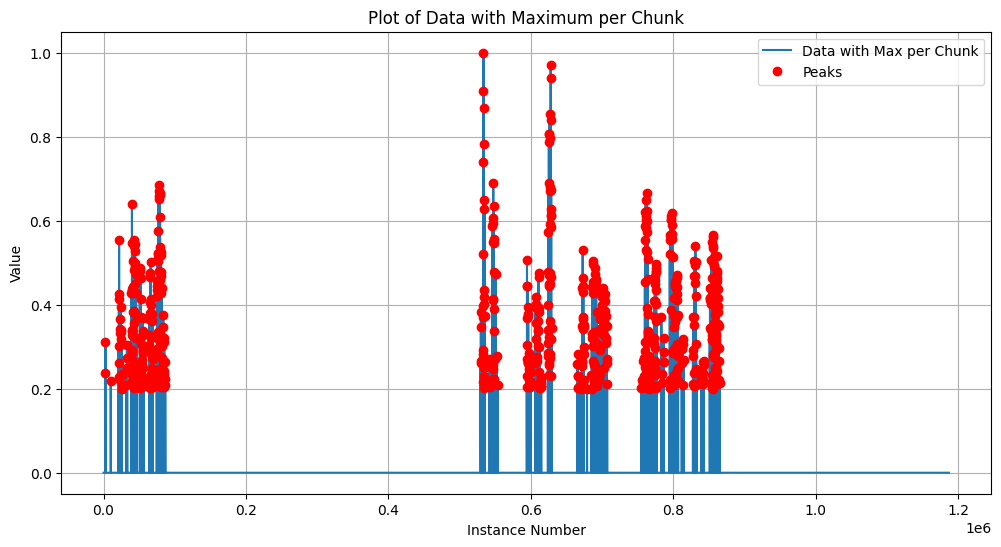

In [16]:
data_flat = modified_data.flatten()  

new_data = np.zeros_like(data_flat)

for i in range(0, len(data_flat), chunk_size):
    start_idx = i
    end_idx = min(start_idx + chunk_size, len(data_flat))
    chunk = data_flat[start_idx:end_idx]
    
    if len(chunk) > 0:
        max_value = np.max(chunk)
        new_data[start_idx:end_idx] = np.where(chunk == max_value, max_value, 0)

peaks, _ = find_peaks(new_data)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(new_data, label='Data with Max per Chunk')

ax.plot(peaks, new_data[peaks], 'ro', label='Peaks')

ax.set_xlabel('Instance Number')
ax.set_ylabel('Value')
ax.set_title('Plot of Data with Maximum per Chunk')
ax.legend()
ax.grid(True)
plt.show()

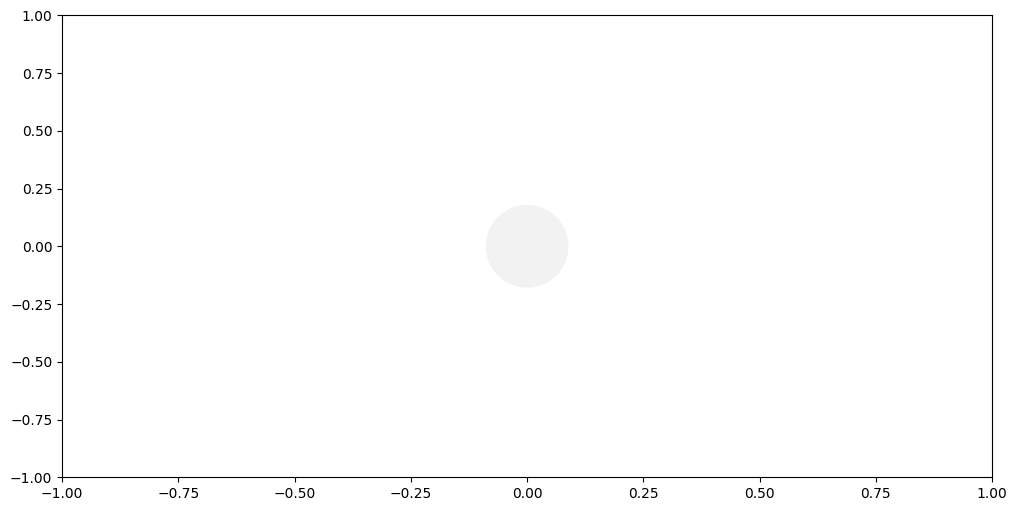

In [17]:

peak_values = new_data[peaks]

sizes = peak_values * 10000  

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('none')  
fig.patch.set_alpha(0)    

sc = ax.scatter([0], [0], s=sizes[0], c='gray', alpha=0.1, edgecolor='none')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

def update(frame):
    current_size = sizes[frame]
    sc.set_sizes([current_size])
    return sc,

frames = round(fps * duration)
interval = round(1 / (fps / 1000))

ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
ani.save('transition_animation1.mp4', writer='ffmpeg', dpi=300, savefig_kwargs={'transparent': True})

MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


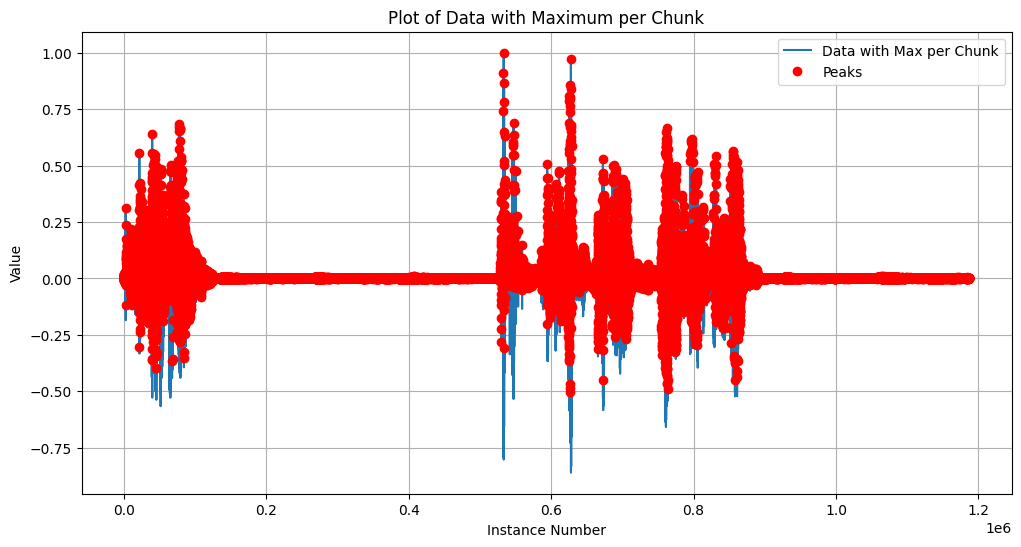

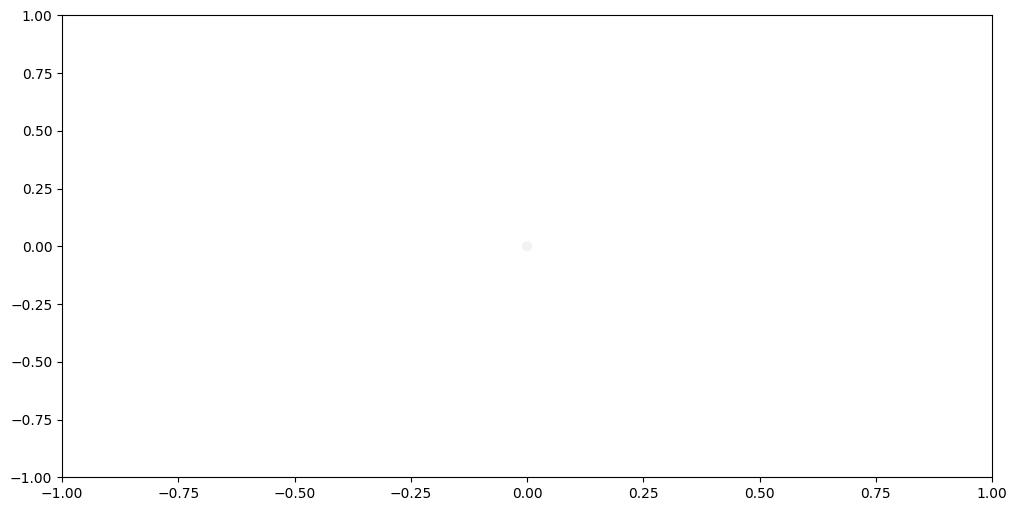

In [2]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import *
from scipy.io import wavfile
from scipy.signal import find_peaks

# Load video and extract audio
video_clip = VideoFileClip("./video.mp4")
extracted_audio = video_clip.audio
extracted_audio.write_audiofile("extracted_audio.wav")
fps = video_clip.fps
duration = np.floor(video_clip.duration)

# Load and normalize audio data
sample_rate, data = wavfile.read("extracted_audio.wav")
data = data / np.max(np.abs(data))

# Flatten data if stereo
if len(data.shape) > 1:
    data = np.max(data, axis=1)

# Transform data
data_transformed = data.reshape(-1, 1)
data_flat = data_transformed.flatten()

# Set chunk size and threshold
chunk_size = 1  # Adjust as needed
threshold = 0.2  # Adjust as needed

# Apply threshold
modified_data = np.where(data_flat > threshold, data_flat, 0)

# Initialize new data array
new_data = np.zeros_like(data_flat)

# Process data in chunks
for i in range(0, len(data_flat), chunk_size):
    start_idx = i
    end_idx = min(start_idx + chunk_size, len(data_flat))
    chunk = data_flat[start_idx:end_idx]

    if len(chunk) > 0:
        max_value = np.max(chunk)
        new_data[start_idx:end_idx] = np.where(chunk == max_value, max_value, 0)

# Find peaks
peaks, _ = find_peaks(new_data)

# Plot the data with peaks
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(new_data, label='Data with Max per Chunk')
ax.plot(peaks, new_data[peaks], 'ro', label='Peaks')
ax.set_xlabel('Instance Number')
ax.set_ylabel('Value')
ax.set_title('Plot of Data with Maximum per Chunk')
ax.legend()
ax.grid(True)
plt.show()

# Prepare for animation
peak_values = new_data[peaks]
sizes = peak_values * 10000

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('none')
fig.patch.set_alpha(0)

sc = ax.scatter([0], [0], s=sizes[0], c='gray', alpha=0.1, edgecolor='none')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

def update(frame):
    current_size = sizes[frame] if frame < len(sizes) else 0
    sc.set_sizes([current_size])
    return sc,

frames = round(fps * duration)
interval = round(1 / (fps / 1000))

ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
ani.save('transition_animation1.mp4', writer='ffmpeg', dpi=300, savefig_kwargs={'transparent': True})


In [6]:
# Load the video clip
video_clip = VideoFileClip("transition_animation1.mp4")

# Load the audio clip
audio_clip = AudioFileClip("extracted_audio.wav")

# Set the duration of the audio clip to match the video if necessary
audio_clip = audio_clip.subclip(0, video_clip.duration)

# Set the audio of the video clip
final_clip = video_clip.set_audio(audio_clip)

# Save the final clip
final_clip.write_videofile("output_video.mp4", codec="libx264", audio_codec="aac")

Moviepy - Building video output_video.mp4.
MoviePy - Writing audio in output_videoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video output_video.mp4



Moviepy - Done !
Moviepy - video ready output_video.mp4


# Current

MoviePy - Writing audio in extracted_audio1.wav


MoviePy - Done.


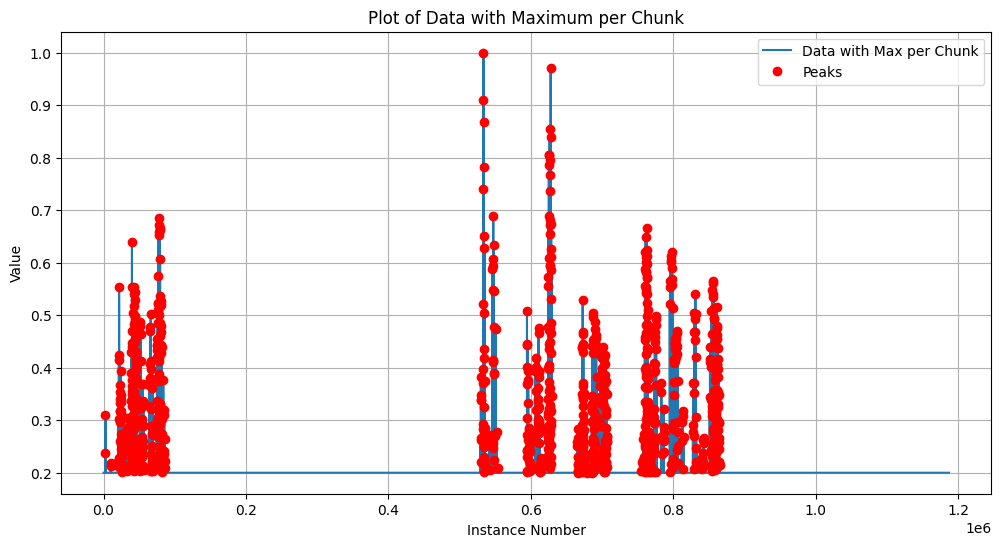

New Data (first 100 values): [  2649   2713  10059 ... 864680 864691 865042]
2.1837302814723167


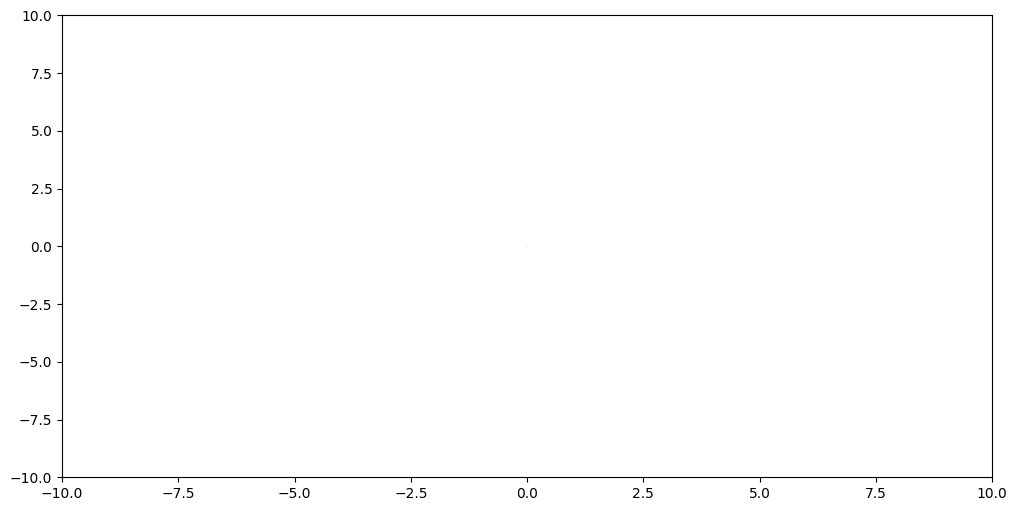

In [9]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import *
from scipy.io import wavfile
from scipy.signal import find_peaks

# Load video and extract audio
video_clip = VideoFileClip("./video1.mp4")
extracted_audio = video_clip.audio
extracted_audio.write_audiofile("extracted_audio1.wav")
fps = video_clip.fps
duration = np.floor(video_clip.duration)

# Load and normalize audio data
sample_rate, data = wavfile.read("extracted_audio1.wav")
data = data / np.max(np.abs(data))

# Flatten data if stereo
if len(data.shape) > 1:
    data = np.max(data, axis=1)

# Remove data less than 0
data = np.where(data<0, 0, data)

# Transform data
data_transformed = data.reshape(-1, 1)
data_flat = data_transformed.flatten()

# Set chunk size and threshold
chunk_size = 1
threshold = 0.2  

# Apply threshold
modified_data = np.where(data_flat > threshold, data_flat, threshold)

# Initialize new data array
new_data = np.zeros_like(data_flat)

# Process data in chunks
for i in range(0, len(modified_data), chunk_size):
    start_idx = i
    end_idx = min(start_idx + chunk_size, len(modified_data))
    chunk = modified_data[start_idx:end_idx]

    if len(chunk) > 0:
        max_value = np.max(chunk)
        new_data[start_idx:end_idx] = np.where(chunk == max_value, max_value, 0)

# Find peaks
peaks = np.zeros_like(modified_data)
peaks, _ = find_peaks(new_data)

# Plot the data with peaks
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(new_data, label='Data with Max per Chunk')
ax.plot(peaks, new_data[peaks], 'ro', label='Peaks')
ax.set_xlabel('Instance Number')
ax.set_ylabel('Value')
ax.set_title('Plot of Data with Maximum per Chunk')
ax.legend()
ax.grid(True)
plt.show()

# Prepare for animation
sizes = np.zeros_like(new_data)
print("New Data (first 100 values):", peaks)

# peak_values = np.zeros_like(new_data)
# peak_values[peaks] = new_data[peaks]
# sizes[peaks] = new_data[peaks]
for i in range(len(new_data)):
    sizes[i] = new_data[i] * 10
 
print(sizes[10059])

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('none')
fig.patch.set_alpha(0)

sc = ax.scatter([0], [0], s=2, c='gray', alpha=0.1, edgecolor='none')

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

def update(frame):
    current_size = sizes[frame] if frame < len(sizes) else 0
    sc.set_sizes([current_size])
    return sc,

frames = round(fps * duration)
interval = round(1000 /fps)

ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
ani.save('transition_animation1.mp4', writer='ffmpeg', dpi=300, savefig_kwargs={'transparent': True})



In [23]:
peak_values


array([0., 0., 0., ..., 0., 0., 0.])

MoviePy - Writing audio in extracted_audio1.wav


MoviePy - Done.
frames :  650
interval :  40


data shape :  1187172
chunk size :  1826


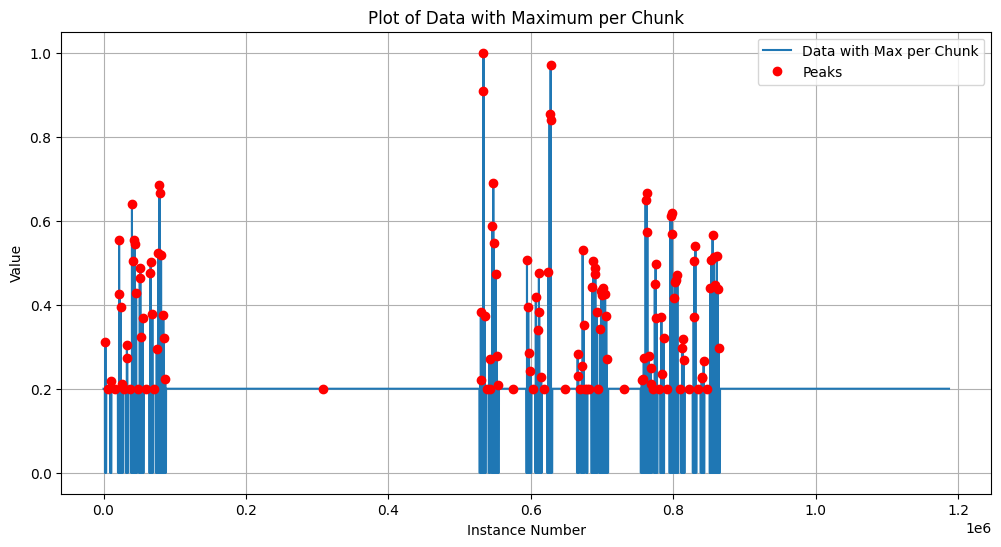

size shape :  (136,)
Sizes max value: 100.0
Sizes (last 100 values): [ 21.96102691  38.32353851  90.96814105 100.          37.39560779
  20.          27.15743891  20.          58.8308073   68.97618311
  54.62418806  47.38632849  27.83792144  20.94030312  20.
  50.72687906  39.3442623   28.45654191  24.12619858  20.
  41.78781318  33.99319517  47.63377668  38.19981441  22.88895762
  20.          47.69563873  85.52428085  96.99969069  84.00866069
  20.          28.30188679  22.9817507   20.          25.4562326
  52.92298175  35.1995051   20.          20.01237241  20.
  44.10763996  50.41756882  47.38632849  48.68543149  38.19981441
  20.          34.33343644  43.21064027  42.31364058  43.8911228
  42.4682957   37.42653882  27.06464584  20.          22.05381998
  22.39406124  27.28116301  64.86235694  66.68728735  57.31518713
  27.77605939  24.83761212  21.18775131  20.          44.97370863
  49.79894835  36.77698732  20.          37.17909063  23.53850912
  32.0754717   20.          61.21

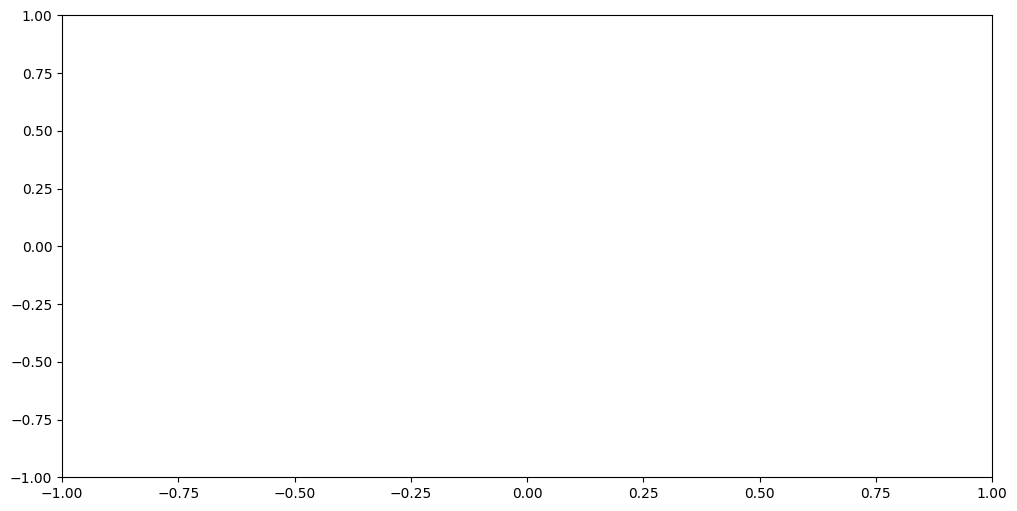

In [43]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import *
from scipy.io import wavfile
from scipy.signal import find_peaks

video_clip = VideoFileClip("./video1.mp4")
extracted_audio = video_clip.audio
extracted_audio.write_audiofile("extracted_audio1.wav")
fps = video_clip.fps
duration = np.floor(video_clip.duration)

frames = round(fps * duration)
print("frames : ", frames)
interval = round(1000 / fps)
print("interval : ", interval)

sample_rate, data = wavfile.read("extracted_audio1.wav")
data = data / np.max(np.abs(data))

if len(data.shape) > 1:
    data = np.max(data, axis=1)

data = np.where(data < 0, 0, data)

data_transformed = data.reshape(-1, 1)
data_flat = data_transformed.flatten()
print("data shape : ", data.shape[0])

chunk_size = int(data.shape[0] / frames)
threshold = 0.2
print("chunk size : ", chunk_size)

modified_data = np.where(data_flat > threshold, data_flat, threshold)

new_data = np.zeros_like(data_flat)

for i in range(0, len(modified_data), chunk_size):
    start_idx = i
    end_idx = min(start_idx + chunk_size, len(modified_data))
    chunk = modified_data[start_idx:end_idx]

    if len(chunk) > 0:
        max_value = np.max(chunk)
        new_data[start_idx:end_idx] = np.where(chunk == max_value, max_value, 0)

peaks, _ = find_peaks(new_data)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(new_data, label='Data with Max per Chunk')
ax.plot(peaks, new_data[peaks], 'ro', label='Peaks')
ax.set_xlabel('Instance Number')
ax.set_ylabel('Value')
ax.set_title('Plot of Data with Maximum per Chunk')
ax.legend()
ax.grid(True)
plt.show()

peak_values = np.zeros(frames)
peak_values = new_data[peaks]
sizes = peak_values * 10 
print("size shape : ", sizes.shape)


print("Sizes max value:", np.max(sizes))
print("Sizes (last 100 values):", sizes[-100:])

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('none')
fig.patch.set_alpha(0)

sc = ax.scatter([0], [0], s=2, c='gray', alpha=0.1, edgecolor='none') 

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

def update(frame):
    current_size = sizes[frame] if frame < len(sizes) else 0
    sc.set_sizes([current_size])
    return sc,



ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
ani.save('transition_animation1.mp4', writer='ffmpeg', dpi=300, savefig_kwargs={'transparent': True})


# Interpolation 

MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


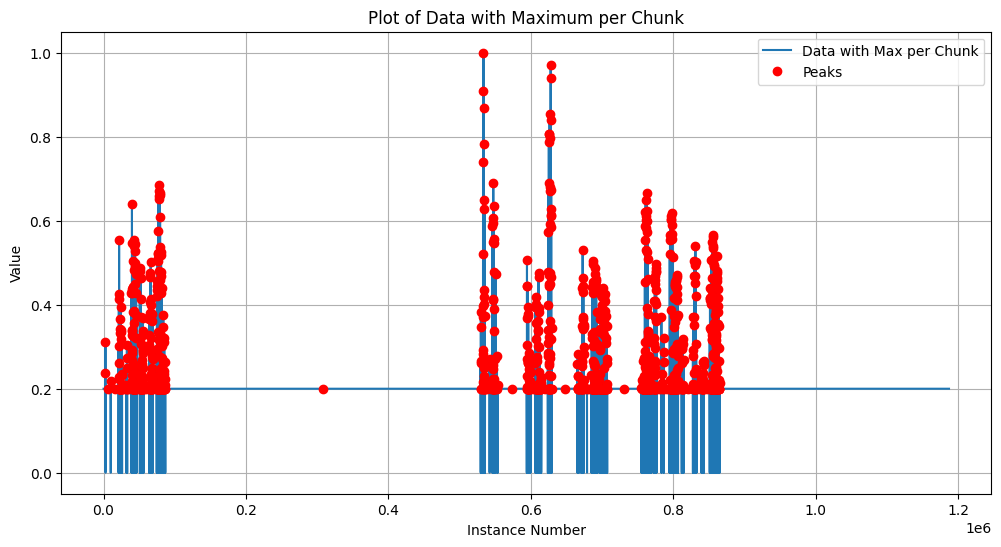

Sizes array example values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Some values from sizes_interp: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


KeyboardInterrupt: 

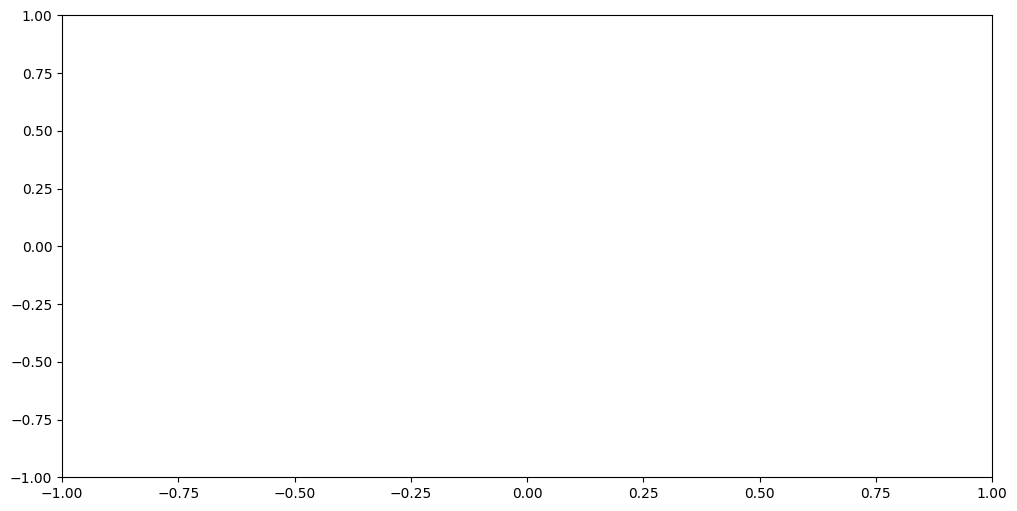

In [3]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import *
from scipy.io import wavfile
from scipy.signal import find_peaks

# Load video and extract audio
video_clip = VideoFileClip("./video.mp4")
extracted_audio = video_clip.audio
extracted_audio.write_audiofile("extracted_audio.wav")
fps = video_clip.fps
duration = np.floor(video_clip.duration)

# Load and normalize audio data
sample_rate, data = wavfile.read("extracted_audio.wav")
data = data / np.max(np.abs(data))

# Flatten data if stereo
if len(data.shape) > 1:
    data = np.max(data, axis=1)

# Remove data less than 0
data = np.where(data < 0, 0, data)

# Transform data
data_transformed = data.reshape(-1, 1)
data_flat = data_transformed.flatten()

# Set chunk size and threshold
chunk_size = 100  # Adjust as needed
threshold = 0.2  # Adjust as needed

# Apply threshold
modified_data = np.where(data_flat > threshold, data_flat, threshold)

# Initialize new data array
new_data = np.zeros_like(data_flat)

# Process data in chunks
for i in range(0, len(modified_data), chunk_size):
    start_idx = i
    end_idx = min(start_idx + chunk_size, len(modified_data))
    chunk = modified_data[start_idx:end_idx]

    if len(chunk) > 0:
        max_value = np.max(chunk)
        new_data[start_idx:end_idx] = np.where(chunk == max_value, max_value, 0)

# Find peaks
peaks, _ = find_peaks(new_data)

# Plot the data with peaks
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(new_data, label='Data with Max per Chunk')
ax.plot(peaks, new_data[peaks], 'ro', label='Peaks')
ax.set_xlabel('Instance Number')
ax.set_ylabel('Value')
ax.set_title('Plot of Data with Maximum per Chunk')
ax.legend()
ax.grid(True)
plt.show()

# Prepare for animation
peak_values = np.zeros_like(new_data)
sizes = np.zeros_like(new_data)
peak_values[peaks] = new_data[peaks]
sizes[peaks] = peak_values[peaks] * 100000

# Debug: Print some values from sizes
print("Sizes array example values:", sizes[:10])

# Interpolate sizes to match the total number of frames
frames = int(fps * duration)
sizes_interp = np.interp(np.linspace(0, len(sizes) - 1, frames), np.arange(len(sizes)), sizes)

# Debug: Print some values from sizes_interp
print("Some values from sizes_interp:", sizes_interp[:10])


fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('none')
fig.patch.set_alpha(0)

# Initialize with a visible size
sc = ax.scatter([0], [0], s=100, c='gray', alpha=0.1, edgecolor='none')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

def update(frame):
    if frame < len(sizes_interp):
        current_size = sizes_interp[frame]
        sc.set_sizes([current_size])
    return sc,

interval = 1000 / fps  # Interval in milliseconds

ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
ani.save('transition_animation1.mp4', writer='ffmpeg', dpi=300, savefig_kwargs={'transparent': True})


In [ ]:
# Load the video clip
video_clip = VideoFileClip("transition_animation1.mp4")

# Load the audio clip
audio_clip = AudioFileClip("extracted_audio.wav")

# Set the duration of the audio clip to match the video if necessary
audio_clip = audio_clip.subclip(0, video_clip.duration)

# Set the audio of the video clip
final_clip = video_clip.set_audio(audio_clip)

# Save the final clip
final_clip.write_videofile("output_video.mp4", codec="libx264", audio_codec="aac")